# **Chapter 3: From Data to Networks**

In [55]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
from numpy import random as nprand
import random
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)

In [56]:
import networkx as nx

## Reading and writing network files

#### Example edge list network:
source target 
<br>
Winegroom Uptown
<br>
Winegroom Strawshop
<br>
Uptown Strawshop
<br>
Uptown Amazelake
<br>
Strawshop Province

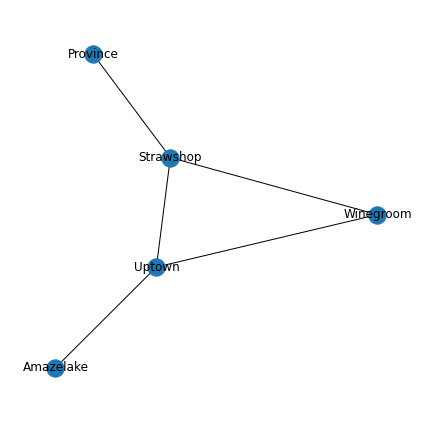

In [58]:
# By default, NetworkX interprets any whitespace as the end of a node ID and the start of a new one
  # To have whitespace in a node ID, use the delimeter parameter to specify a different delimeter, such as
  # "\t" tab character

# Before reading network file, store the directory containing the data in data_dir

from pathlib import Path
data_dir = Path('.') / 'Network-Science-with-Python-and-NetworkX-Quick-Start-Guide'/ 'data'

# Read edge list: read_edgelist() function creates a Graph class from the edge list file
G = nx.read_edgelist(str(data_dir / 'example.edgelist'))

# Draw network
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

#### Directed edge list

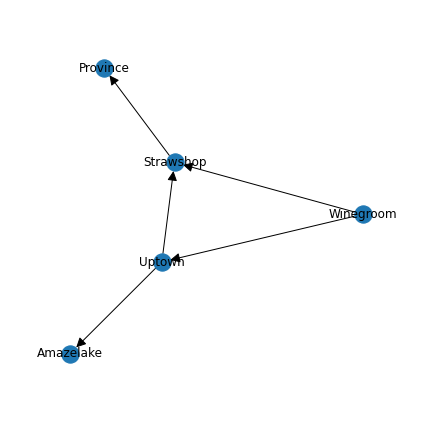

In [59]:
# NetworkX assumes the edge list represents an undirected network. If network is directed,
# read_edgelist() function can return a DiGraph class if implemented as follows:
    # For directed networks, first node on each line of the edge list will be interpreted as
    # the source, and the second as the target

# Read edge list
G = nx.read_edgelist(
    str(data_dir / 'example.edgelist'),
    create_using=nx.DiGraph)
# Draw network

nx.draw_networkx(G, pos, arrowsize=20)
plt.gca().margins(0.15, 0.15)

#### Weighted edge list

##### New example weighted edge list network:
source target weight
<br>
Winegroom Uptown 1
<br>
Winegroom Strawshop 5
<br>
Uptown Strawshop 9
<br>
Uptown Amazelake 6
<br>
Strawshop Province 3

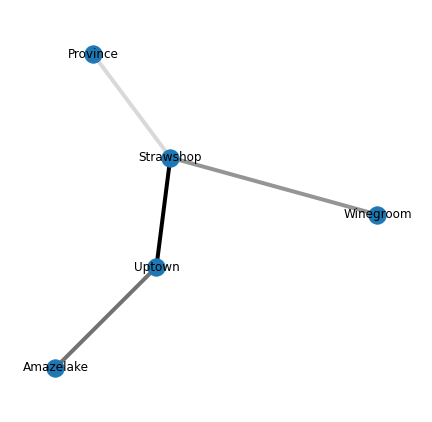

In [60]:
# read_weighted_edgelist() function creates a network with edge weights
# Read edge list
G = nx.read_weighted_edgelist(
    str(data_dir / 'weighted.edgelist'))

# Extract weights
weights = [d['weight'] for s, t, d in G.edges(data=True)]

# Draw network with edge colors corresponding to their weight
ax = plt.subplot(111)
nx.draw_networkx(
    G, pos, width=4, edge_color=weights, edge_cmap=plt.cm.Greys)
ax.margins(0.15, 0.15)

#### Edge list with edge attributes 

In addition to weights, edge list format also supports specifying additional attributes for each edge
(though not for nodes). For instance, label different routes in the example subway with colors as follows: 
<br>
<br>
source target data1 data2 ...
<br>
Winegroom Uptown 1 red
<br>
Winegroom Strawshop 5 orange 
<br>
Uptown Strawshop 9 blue
<br>
Uptown Amazelake 6 red
<br>
Strawshop Province 3 orange

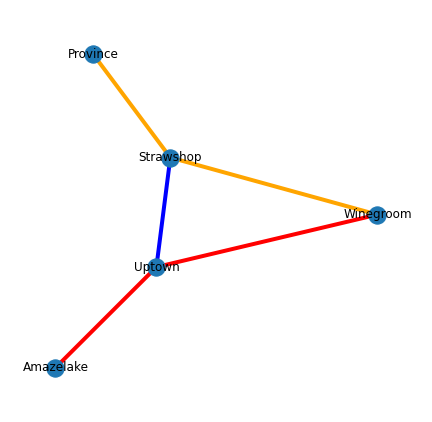

In [61]:
# These attributes can be read with either read_edgelist() or read_weighted_edgelist() by passing the data parameter,
# which must be a list of 2-tuples where
#    1. the first element of each tuple is a string that tells NetworkX which attribute to set
#    2. the second element is an object constructor (often built-in Python classes: str, int, float, etc- but any that
#       accepts a string parameter) used to create edge attributes
# Note: weight can be handled like any other attribute if using read_edgelist() rather than read_weighted_edgelist()

# Read edge list
G = nx.read_edgelist(
    str(data_dir / 'attributes.edgelist'),
    data=[('weight', float), ('color', str)])

# Extract colors
colors = [d['color'] for s, t, d in G.edges(data=True)]

# Draws subway network with edges colored according to their color attribute
ax = plt.subplot(111)
nx.draw_networkx(
    G, pos, width=4, edge_color=colors)
ax.margins(0.15, 0.15)

#### Adjacency list
A good alternative to edge lists, when it's convenient to have a simple, plain-text
representation of a network. In an adjacency list-formatted file, multiple nodes are listed on each line, and 
NetworkX creates an edge (directed or undirected) from the first node on each line to subsequent nodes on that line. 
<br>
<br>
Pros: brevity- most edges can be specified by adding a single term instead of two
<br>
Cons: inability to specify edge attributes
<br>
<br>
##### Adjacency list for our subway example: 
source target1 target2 ... <br>
Winegroom Uptown Strawshop
<br>
Uptown Strawshop Amazelake Winegroom 
<br>
Strawshop Winegroom 
<br>
Province Strawshop


In [62]:
# Turn this adjacency list file into a network
# No need to plot the output since it's the exame same network as before
G_adj = nx.read_adjlist(str(data_dir / 'example.adjlist'))

In [63]:
# Can also export networks in edge list and adjacency list format using the write_edgelist() and 
# write_adjlist() functions

# Just need to pass a Graph class, DiGraph class, or other NetworkX object and specify path name
nx.write_edgelist(G, "out.edgelist")
nx.write_adjlist(G, "out.adjlist")

#### GEXF
##### XML-based format that supports node attributes in addition to edge attributes
More complex, but see the following example for demonstration

In [64]:
# Adds an abbreviation attribute to each node
for v in G.nodes:
    G.nodes[v]['abbreviation'] = v[0]
    
# read_gexf() and write_gexf() handles node and edge attributes 

# export the network as GEXF as follows
# specifying 'sys.stdout' writes the output to the screen rather than to a file
import sys
nx.write_gexf(G, sys.stdout)

<?xml version='1.0' encoding='utf-8'?>
<gexf xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.gexf.net/1.2draft http://www.gexf.net/1.2draft/gexf.xsd" version="1.2">
  <meta lastmodifieddate="2021-03-15">
    <creator>NetworkX 2.5</creator>
  </meta>
  <graph defaultedgetype="undirected" mode="static" name="">
    <attributes mode="static" class="edge">
      <attribute id="1" title="color" type="string" />
    </attributes>
    <attributes mode="static" class="node">
      <attribute id="0" title="abbreviation" type="string" />
    </attributes>
    <nodes>
      <node id="Winegroom" label="Winegroom">
        <attvalues>
          <attvalue for="0" value="W" />
        </attvalues>
      </node>
      <node id="Uptown" label="Uptown">
        <attvalues>
          <attvalue for="0" value="U" />
        </attvalues>
      </node>
      <node id="Strawshop" label="Strawshop">
        <attvalues>
          <attvalu

#### JSON
##### Format that also supports node attributes
More compact that GEXF, and very convenient when working with Javacript when using d3.js visualization library. See NetworkX documentation for more information

In [65]:
# Generates a JSON representation of a network
nx.node_link_data(G)

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'abbreviation': 'W', 'id': 'Winegroom'},
  {'abbreviation': 'U', 'id': 'Uptown'},
  {'abbreviation': 'S', 'id': 'Strawshop'},
  {'abbreviation': 'A', 'id': 'Amazelake'},
  {'abbreviation': 'P', 'id': 'Province'}],
 'links': [{'weight': 1.0,
   'color': 'red',
   'source': 'Winegroom',
   'target': 'Uptown'},
  {'weight': 5.0,
   'color': 'orange',
   'source': 'Winegroom',
   'target': 'Strawshop'},
  {'weight': 9.0, 'color': 'blue', 'source': 'Uptown', 'target': 'Strawshop'},
  {'weight': 6.0, 'color': 'red', 'source': 'Uptown', 'target': 'Amazelake'},
  {'weight': 3.0,
   'color': 'orange',
   'source': 'Strawshop',
   'target': 'Province'}]}

## Creating a network with code
Build a network programmatically when your data set is too complex or messy to easily 
convert it to one of the previous formats
<br>
<br>
In this example: build a co-occurrence network, which examines the relationship between words in a particular set of documents (in this case, any collection of words). The network in this example measures word co-occurrences at the sentence level- the edge weight between words increases by one for each sentence in which they appear together

In [66]:
# Ignore articles, pronouns, etc. since they appear in most sentences
stop_words = set([
    'the', 'of', 'and', 'i', 'to', 'my', 'in', 'was', 'that', 'thy',
    'a', 'had', 'my', 'with', 'but', 'he', 'she', 'you', 'your',
    'me', 'not', 'as', 'will', 'from', 'on', 'be', 'it', 'which',
    'for', 'his', 'him', 'chapter', 'at', 'who', 'by', 'have',
    'would', 'is', 'been', 'when', 'they', 'there', 'we', 'are',
    'our', 'if', 'her', 'were', 'than', 'this', 'what', 'so',
    'yet', 'more', 'their', 'them', 'or', 'could', 'an', 'can',
    'said', 'may', 'do', 'these', 'shall', 'how', 'shall', 'asked',
    'before', 'those', 'whom', 'am', 'even', 'its', 'did', 'then',
    'abbey', 'tintern', 'wordsworth', 'letter', 'thee', 'thou', 'oh',
    'into', 'any', 'myself', 'nor', 'himself', 'one', 'all', 'no', 'yes'
    'now', 'upon', 'only', 'might', 'every', 'own', 'such', 'towards',
    'again', 'most', 'ever', 'where', 'after', 'up', 'soon', 'many',
    'also', 'like', 'over', 'us', 'thus', 'has', 'about']
    + [str(x) for x in range(24)])

In [67]:
# Creates a co-occurrence network from a text string

# This example uses regular expressions from the re package
import re
# Construct a network from a text
def co_occurrence_network(text):
    # Create a new network
    G = nx.Graph()
    # Split the text into sentences and iterate through them
    # Dividing text into chunks like so is called "tokenizing". In practice, easier and more reliable to use
    # a tokenization function from a library, like spaCy
    sentences = text.split('.')
    for s in sentences:
        # Remove punctuation and convert to lowercase
        clean = re.sub('[^\w\n ]+', '', s).lower()
        clean = re.sub('_+', '', clean).strip()
        # Create list of words separated by whitespace
        words = re.split('\s+', clean)
        # Create an edge for each pair of words
        for v in words:
            # Update word count, add node if necessary
            try:
                G.nodes[v]['count'] += 1
            except KeyError:
                G.add_node(v)
                G.nodes[v]['count'] = 1
            # Update edge count for each pair of words in this sentence
            for w in words:
                # Skip stop words
                if v == w or v in stop_words or w in stop_words:
                    continue
                # Skip blank space
                if len(v) == 0 or len(w) == 0:
                    continue
                # Add one to the edge's count
                try:
                    G.edges[v, w]['count'] += 1
                except KeyError:
                    # Edge doesn't exist, create it
                    G.add_edge(v, w, count=1)
    return G

In [68]:
# Read the text using the function defined above
with open(data_dir / 'shelley1818' / 'frankenstein.txt') as f:
    text = f.read()
# Create a network from the text
G = co_occurrence_network(text)

In [69]:
# Sort edges by their count attribute to reveal the most commonly occurring words
pairs = sorted(
    G.edges(data=True),
    key=lambda e: e[2]['count'],
    reverse=True)
pairs[0:10]

[('man', 'old', {'count': 68}),
 ('country', 'native', {'count': 38}),
 ('first', 'now', {'count': 32}),
 ('death', 'life', {'count': 32}),
 ('human', 'being', {'count': 32}),
 ('natural', 'philosophy', {'count': 32}),
 ('eyes', 'tears', {'count': 30}),
 ('first', 'eyes', {'count': 28}),
 ('some', 'time', {'count': 28}),
 ('night', 'during', {'count': 28})]

(-0.1, 0.1)

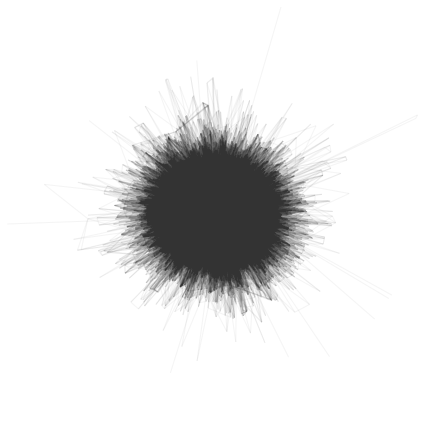

In [70]:
# Visualize this network. In this case, since there are too many nodes and edges, the image is what's called a 
# "hairball" in network science- generally best avoided
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, alpha=0)
nx.draw_networkx_edges(
    G, pos, edge_color="#333333", alpha=0.05)
# Zoom in for a better view
plt.xlim([-0.1,0.1]); plt.ylim([-0.1, 0.1])

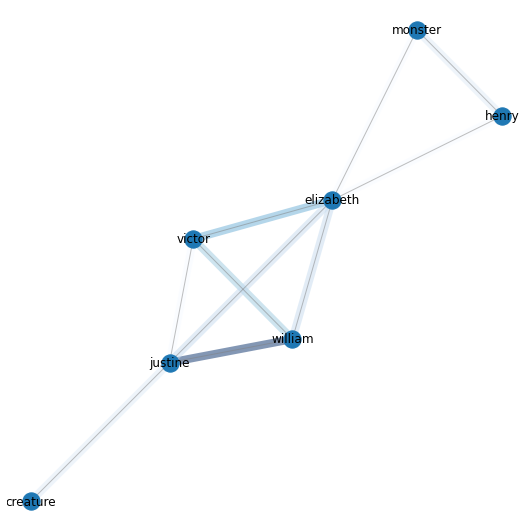

In [72]:
# To avoid a "hairball"-like visualization, focus on a particular aspect or set of nodes in the network

# Count co-occurrences for any two characters mentioned in the same sentence only
characters = [
    'creature', 'monster', 'victor', 'elizabeth',
    'william', 'henry', 'justine']
# The subgraph() method of the Graph class creates a new graph containing a subset of the nodes and edges in the original
G_focus = G.subgraph(characters)
# Create list of edge counts
counts = [G_focus.edges[e]['count'] for e in G_focus.edges]

# Create spring layout
pos = nx.spring_layout(G_focus)

# Create figure and draw nodes
plt.figure()
nx.draw_networkx_nodes(G_focus, pos)
# Draw edges with colors based on their count edge attribute
nx.draw_networkx_edges(
    G_focus, pos, width=8,
    edge_color=counts, edge_cmap=plt.cm.Blues, alpha=0.5)
nx.draw_networkx_edges(G_focus, pos, edge_color="#7f7f7f",alpha=0.5)
# Draw labels
nx.draw_networkx_labels(G_focus, pos)
plt.tight_layout()